In [2]:
import pydmd
from vtianalysis import *
from methods_dump import *
import numpy as np
import sys, os, subprocess
import matplotlib.pyplot as plt


In [3]:
dir_path = r"E:\2024_05_08\1327rpm_downstream"
muvi = VTIAnalysis(dir_path)

In [4]:
vm = muvi.vm

In [5]:
vm[0].shape

(256, 256, 1280)

In [7]:
ω = np.load(os.path.join(muvi.vol_path, 'vorticity_frame_0002.npy'))
ω.shape

(30, 30, 151, 3)

In [41]:
frames = []
for i in range(100,150,1):
    ω = np.load(muvi.vol_path+f'/vorticity_frame_{i:04}.npy', allow_pickle=False)
    frames.append(ω.reshape(407700))

In [46]:
X = np.array(frames)
np.nan_to_num(X,copy=False)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
from pydmd import DMD, BOPDMD
from pydmd.plotter import plot_eigs, plot_summary
from pydmd.preprocessing import hankel_preprocessing


c:\Users\labuser\anaconda3\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 31795549258476.855. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


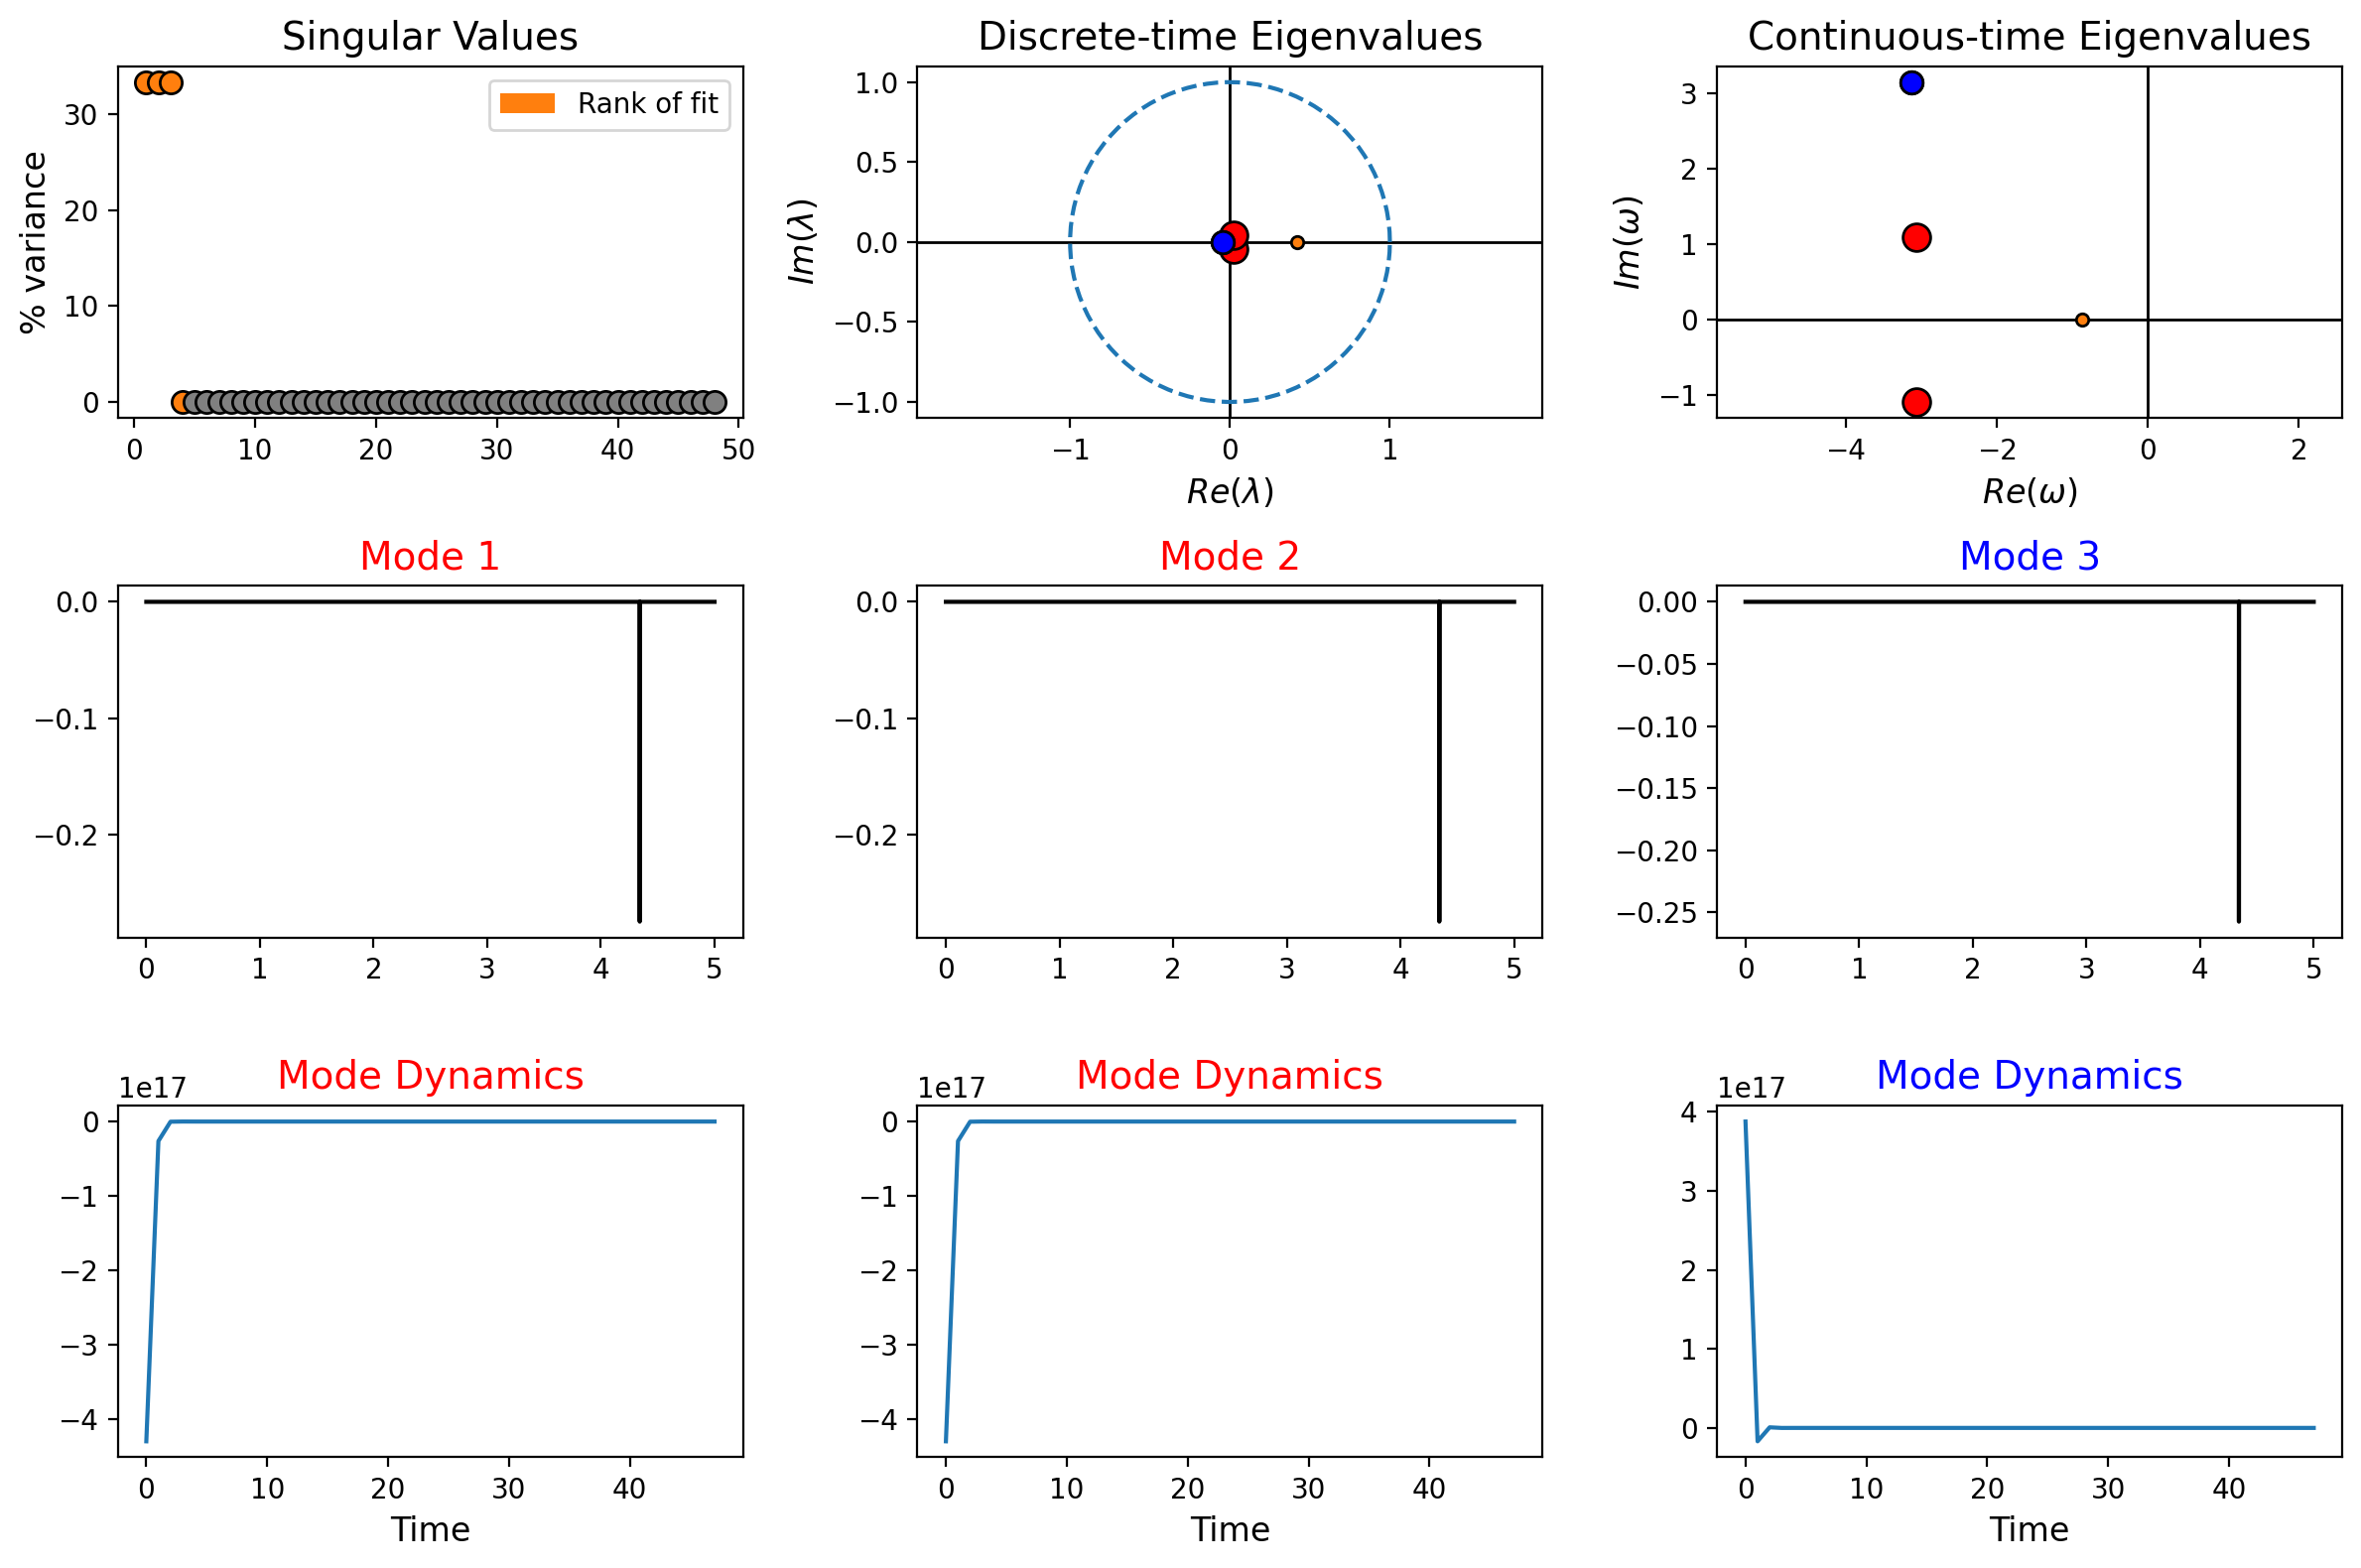

Frequencies (imaginary component): [-3.13019292+3.14159265j -3.06571946+1.09128165j -3.06571946-1.09128165j
 -0.86514606+0.j        ]


In [57]:
d = 3  # we will use this number of delays throughout the tutorial
dmd = DMD(svd_rank=4)
delay_dmd = hankel_preprocessing(dmd, d=d)
delay_dmd.fit(X.T)
t = np.linspace(100, 150, 51)
x = np.linspace(0, 5, 407700)
dt = t[1]-t[0]
plot_summary(delay_dmd, x=x, t=dt, d=d)
print(
    f"Frequencies (imaginary component): {np.round(np.log(delay_dmd.eigs) / dt, decimals=12)}"
)
# plt.title("Reconstructed Data")
# plt.imshow(delay_dmd.reconstructed_data.real)
# plt.show()
# plt.title("Clean Ground Truth Data")
# plt.imshow(X.T)
# plt.show()